In [1]:
import myutils as my
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
df = pd.read_table("./data/glove.6B.100d.txt", delimiter=" ", header=None, index_col=0, quoting=3)

In [3]:
lens = (df**2).sum(axis=1).sort_values()
dfn = df.div(np.sqrt(lens), axis='index')

/home/julia/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4256: RuntimeWarning: unorderable types: str() > float(), sort order is undefined for incomparable objects
  return_indexers=True)


In [9]:
godsies = my.similar(dfn, dfn.loc["god"], 40).drop(["god"])

In [14]:
godplot = my.get_with_axes(dfn, godsies.index, dfn.loc["god"], dfn.loc["good"]-dfn.loc["evil"]).rename(columns={"a":"god", "b":"evil___good"})

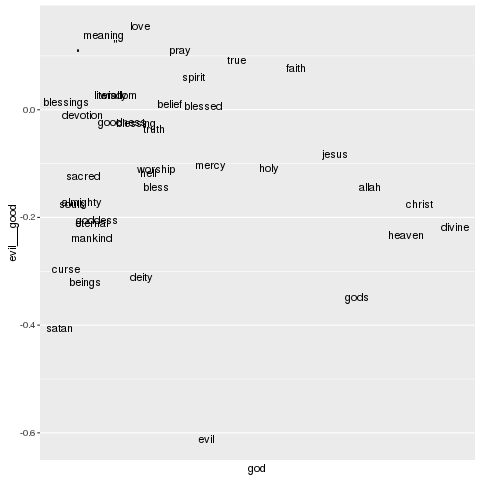

In [17]:
%%R -i godplot
library(ggplot2)

ggplot(godplot, aes(god, evil___good, label=name)) +
  geom_text() +
  scale_x_log10()